<a href="https://colab.research.google.com/github/Gr8eye/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Always imports first
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


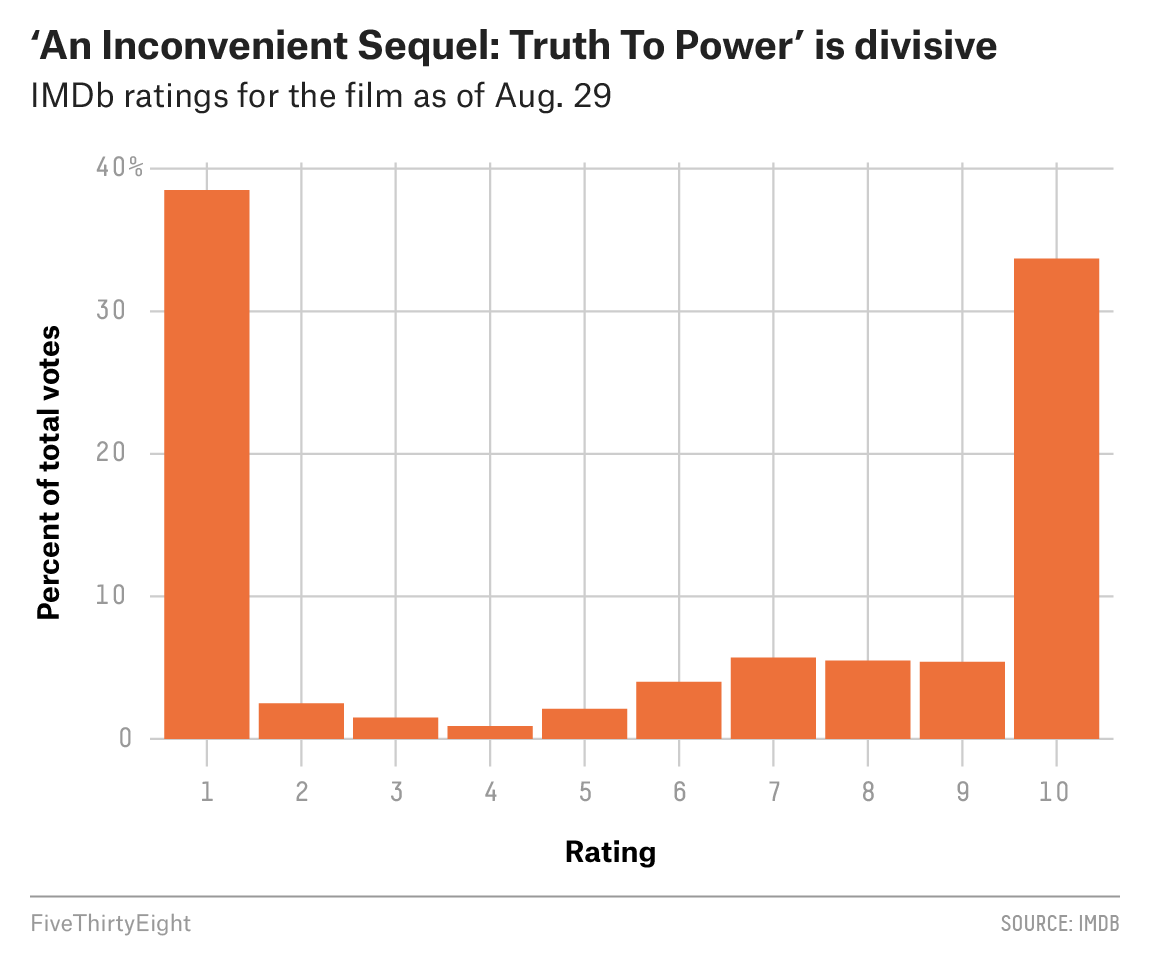

In [0]:
# Beginning with replicating the code we'll start with recreating the graph from the lesson
# Which means reproducing the the example
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url, width=400)

display(example)

In [0]:
# Make prototype to understand the problem
# plt.style.available gives a list of background styles I need 'fivethirtyeight'
plt.style.use('fivethirtyeight')

In [0]:
# Start with making a list of the data and turn it into a pandas series
GDatalist = [39, 3, 2, 1, 3, 4, 5.5, 5, 5, 33]
GData = pd.Series(GDatalist, index=range(1,11))
GData

1     39.0
2      3.0
3      2.0
4      1.0
5      3.0
6      4.0
7      5.5
8      5.0
9      5.0
10    33.0
dtype: float64

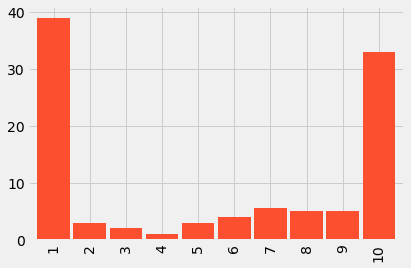

In [0]:
# Display that list as a bar
GData.plot.bar(color='C1', width=0.9);

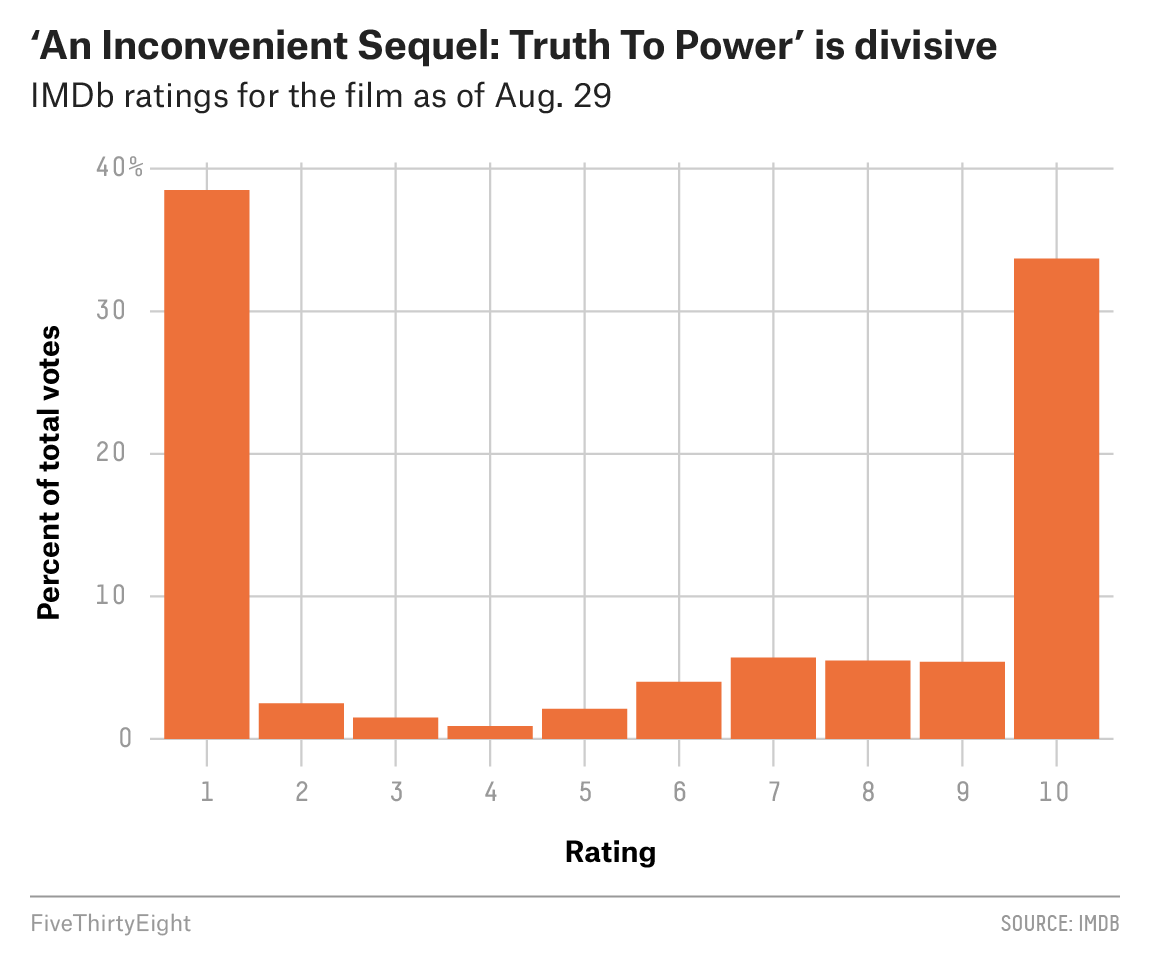

In [0]:
# Compare to original
display(example)

In [0]:
# Try a more detailed method
GDatalist2 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                2,2,2,
                3,3,
                4,
                5,5,5,
                6,6,6,6,
                7,7,7,7,7,7,
                8,8,8,8,8,
                9,9,9,9,9,
                10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]


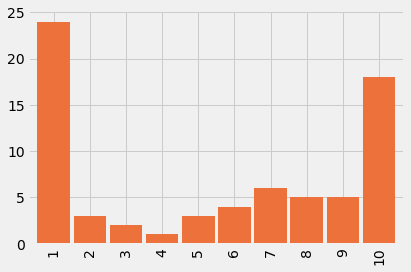

In [0]:
GData2 = pd.Series(GDatalist2)
GData2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9);

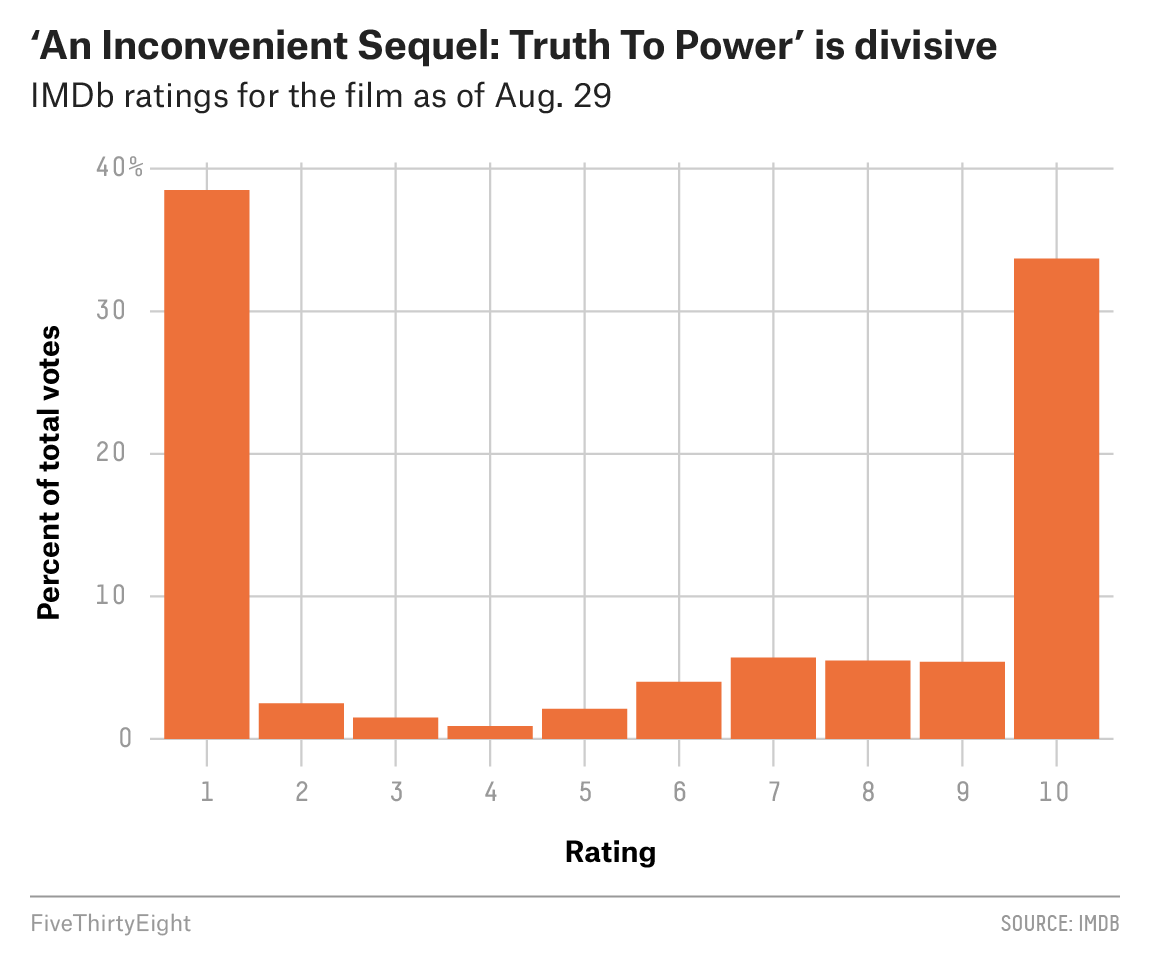

In [0]:
# Compare
display(example)

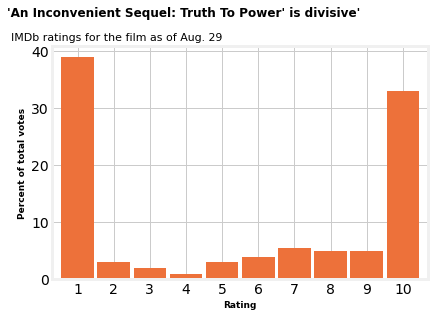

In [0]:
# Next annotation
# Background
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Bars
GData.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")
 
# Title and Subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive'",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=11, x=-1.85, y=42);

# X and Y labels
ax.set_xlabel("Rating", fontsize=9, fontweight = 'bold')
ax.set_ylabel("Percent of total votes", fontsize=9, fontweight='bold')

# X and Y ticks and grid

ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

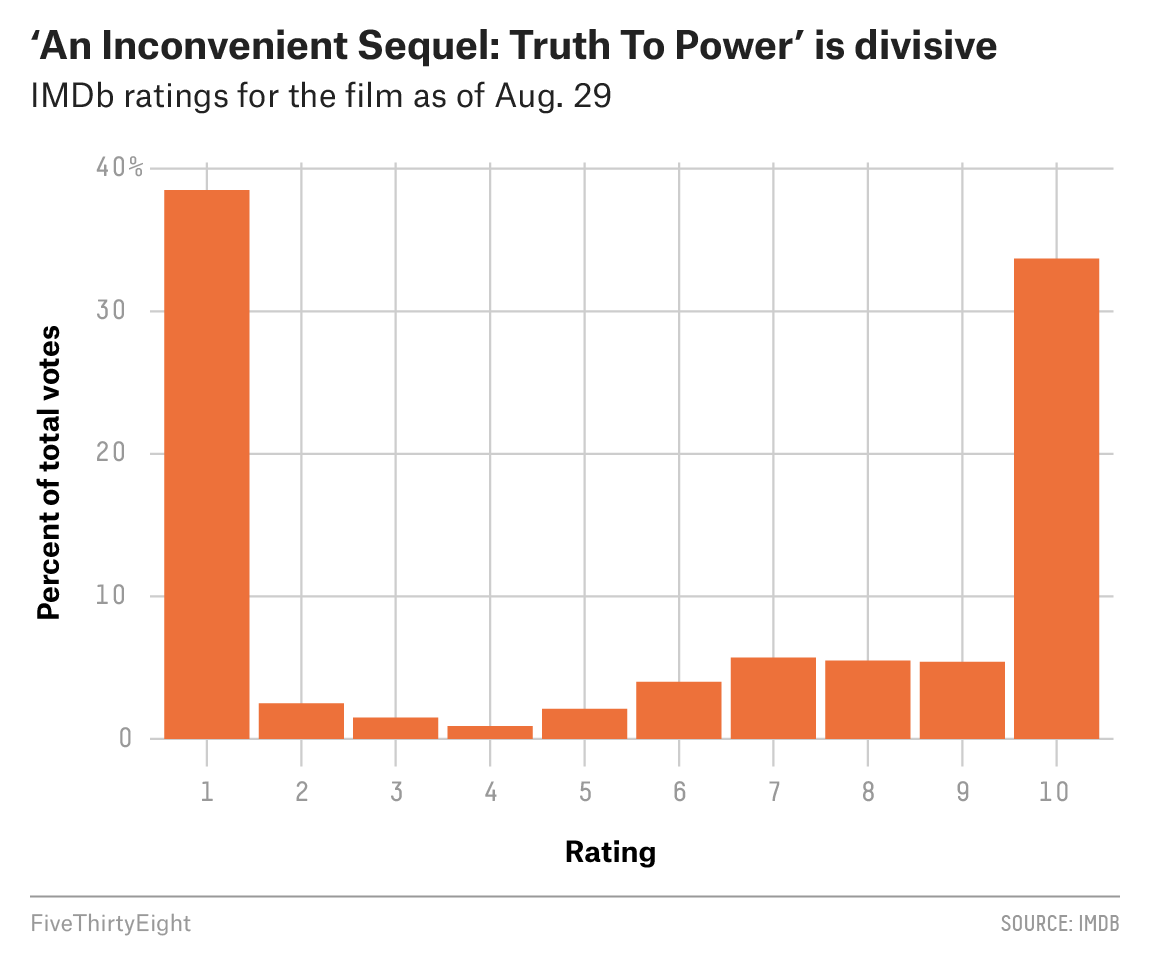

In [0]:
#Final check 
display(example)

In [0]:
#Why fake it when you can replicate it (with real data)
# Get data 
Ratings = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
Ratings.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Convert timestamp(strings) to datetime (object)
Ratings['Datetime'] = pd.to_datetime(Ratings['timestamp'])

In [0]:
# Check that
Ratings[['timestamp', 'Datetime']].sample(5)

,timestamp,Datetime
37338,2017-08-14 08:20:06.038828,2017-08-14 08:20:06.038828
73634,2017-08-27 15:00:03.430927,2017-08-27 15:00:03.430927
28063,2017-08-10 23:00:05.651908,2017-08-10 23:00:05.651908
58878,2017-08-22 05:30:04.812319,2017-08-22 05:30:04.812319
59436,2017-08-22 10:20:06.091510,2017-08-22 10:20:06.091510


In [0]:
# Confirm
print(type(Ratings['timestamp'][0]))
print(type(Ratings['Datetime'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [0]:
#Use Datetime as the unique index identifier
# This allows rows to be selected by the timestamp
Ratings.set_index('Datetime', inplace=True, drop=True)
# the inplace value makes the change while 'drop' removes extra column
# Confirm
Ratings.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Grabbing rows that correspond to the last day
Last = Ratings['2017-08-29']
print(Ratings.shape)
print(Last.shape)

(80053, 27)
(2660, 27)


In [0]:
# Value counts
Last['category'].value_counts().sort_index()

Aged 18-29            140
Aged 30-44            140
Aged 45+              140
Aged under 18         140
Females               140
Females Aged 18-29    140
Females Aged 30-44    140
Females Aged 45+      140
Females under 18      140
IMDb staff            140
IMDb users            140
Males                 140
Males Aged 18-29      140
Males Aged 30-44      140
Males Aged 45+        140
Males under 18        140
Non-US users          140
Top 1000 voters       140
US users              140
Name: category, dtype: int64

In [0]:
#Demographic breakdowns for users on last day
Last_filtered = Last[Last['category']=='IMDb users']
Last_filtered.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
#Taking last entry 
# most up to date
Final = Last_filtered.tail(1)
Final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
#Tranposing that...
Final.T

Datetime,2017-08-29 23:10:06.218251
timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38


In [0]:
# Grabbing percentage...
PCol = ['1_pct','2_pct', '3_pct', '4_pct', '5_pct',
        '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
Final[PCol].T

Datetime,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
# Renaming column and resetting index(no longer datetime)...
Toplot = Final [PCol].T
Toplot.index=range(1,11)
Toplot.columns=['Percent']
Toplot

,Percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


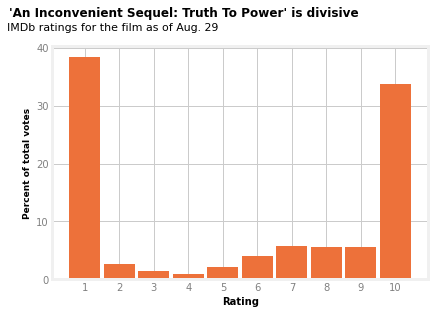

In [0]:
# What's that look like?
fig, ax = plt.subplots()

#Background

fig.patch.set(facecolor="white")

#Bars

ax.bar(x=range(1,11), height=Toplot['Percent'], width=0.9, color = "#ED713A")

#Call color
ax.set(facecolor="white")

#Title and Subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=11, x=-1.25, y=43)

#X and Y labels
ax.set_xlabel("Rating", fontsize=10, fontweight='bold')
ax.set_ylabel("Percent of total votes",fontsize=9, fontweight='bold')

#Tick marks and grid

ax.set_xticklabels(range(1,11),fontsize=10, color= 'grey', rotation = 0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10),fontsize=10, color= 'grey')
ax.set_yticks(range(0,50,10));

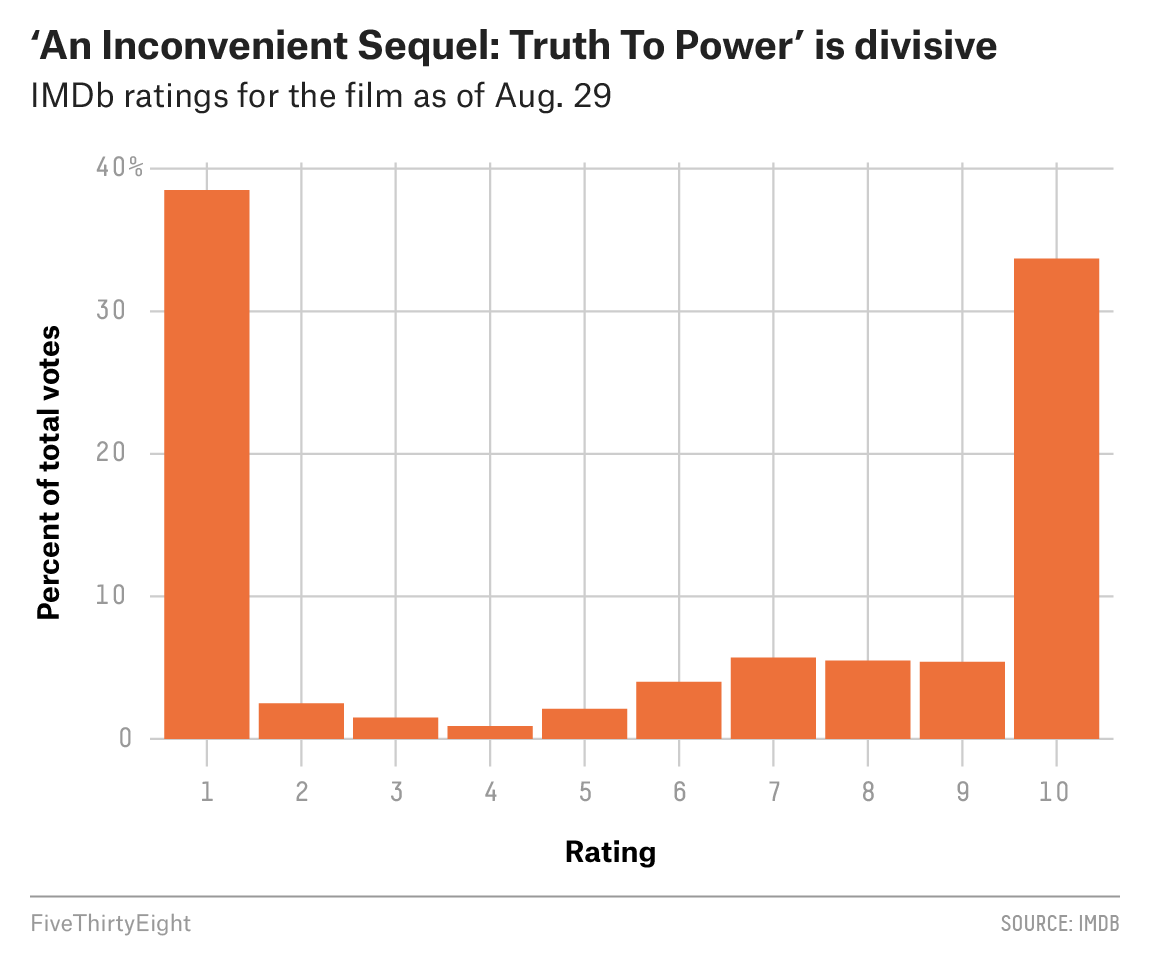

In [0]:
#Compare 
display(example)

## A Statistical Analysis of the Work of Bob Ross
Walt Hickey analyzed the work of Bob Ross and used a horizontal bar graph(Fig) to display the number of times a tag that appeared more than 5 times showed up in the 381 paintings Bob Ross created on his show "The Joy of Painting":


In [0]:
# display image
foto = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png?w=575'
Fig = Image(url=foto, width=450)
display(Fig)

In [0]:
# This graph displays all the information needed to recreate it 
# Pulled data from the graph
Lists = [['At least one tree', 91], ['At least two trees', 85],
        ['Deciduous tree', 56], ['Coniferous tree', 53],
        ['Clouds', 44], ['At least one mountain', 39],
        ['Grass', 36], ['Lake',34], ['River or stream', 33],
        ['Bushes', 30], ['Snow-covered mountain', 26], 
        ['At least two mountains', 24], ['Man-made structure', 22],
        ['Cumulus clouds', 21], ['Rocks', 20], ['Sun', 20], ['Waterfall', 20], 
        ['Snow', 19], ['Cabin', 18],['Winter setting', 18],
        ['Frame',13], ['Path',13], ['Oval frame', 9], ['Ocean', 9], 
        ['Waves', 9], ['Beach', 7], ['Cirrus clouds', 7], ['Fence', 6], 
        ['Fog',6],  ['Hills', 4], ['Barn', 4], ['Nighttime', 3], ['Flowers', 3],
        ['Palm tree', 2], ['Cliff', 2], ['Bridge', 2]]
# make a data frame
ElPer = pd.DataFrame(Lists, columns= ['Elements', 'Percent'])
ElPer

,Elements,Percent
0,At least one tree,91
1,At least two trees,85
2,Deciduous tree,56
3,Coniferous tree,53
4,Clouds,44
5,At least one mountain,39
6,Grass,36
7,Lake,34
8,River or stream,33
9,Bushes,30


In [0]:
#Created just in case
Elements = list(ElPer['Elements'])
Percents = list(ElPer['Percent'])

In [0]:
ElPer.set_index('Elements', inplace=True)
ElPer

,Percent
Elements,
At least one tree,91
At least two trees,85
Deciduous tree,56
Coniferous tree,53
Clouds,44
At least one mountain,39
Grass,36
Lake,34
River or stream,33


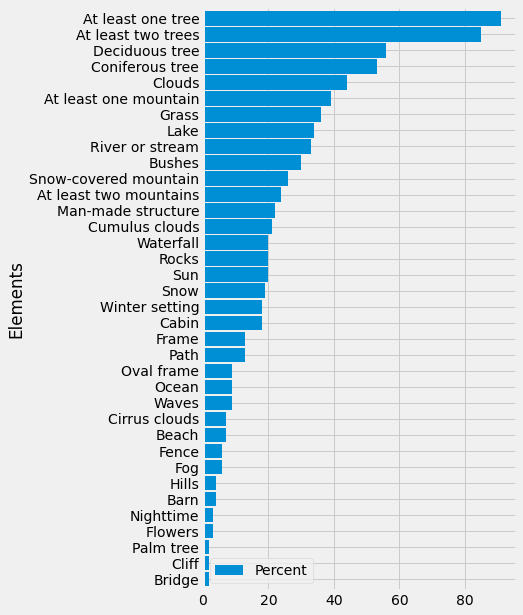

In [0]:
#First Draft
ElPer.sort_values('Percent', ascending=True).plot(kind='barh',figsize=(5, 10), color='#008FD5', width=0.9);

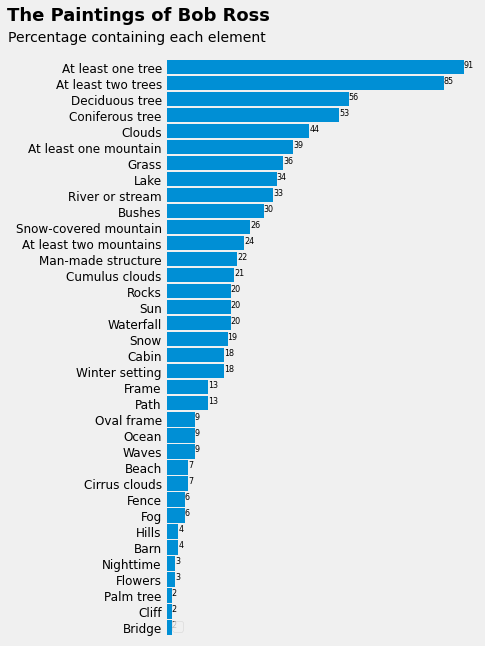

In [0]:
#Polishing...
Fig2 = ElPer.sort_values('Percent', 
                         ascending=True).plot(kind='barh',figsize=(5,10), 
                                              color='#008FD5', width=0.9)
#Annotation 
#Title and Subtitle
Fig2.set_title("The Paintings of Bob Ross", fontsize=18, x=-0.085, y=1.05,
             fontweight='bold')
Fig2.text(s="Percentage containing each element", fontsize=14, x=-48, y=36.575)

#Removing the x and y labels...
Fig2.set_xlabel("")
Fig2.set_ylabel("")
#Removing ticks
Fig2.set_xticklabels("")
#Fixing ticks...
Fig2.set_yticklabels(reversed(Elements),fontsize=12)
#Removing legend
Fig2.legend("")
#Removing grid
Fig2.grid(False)

#Needed to add percentages to the bars 
#Googled like mad before find a solution in creating a for loop
for index, value in enumerate(reversed(Percents)):
  plt.text(value, index, str(value), fontsize=8)

In [0]:
display(Fig)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here